In [138]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import MultiPoint

In [139]:
gdf=gpd.read_file('C:/Users/saadi/Documents/smartlab/data/communes/communes-dile-de-france-au-01-janvier.shp')

In [140]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [152]:
gdf_trips=gpd.read_file('D:/entd/trips.gpkg', rows=100000)

In [153]:
#gdf_trips.head()

In [154]:
gdf_trips_pt=gdf_trips[gdf_trips['mode']=='pt'].copy()

In [155]:
gdf=gdf.to_crs(gdf_trips_pt.crs)

In [156]:
cpt=0
list_of_origins=[]

for k in gdf_trips_pt['geometry'].boundary:
    if not k.is_empty:
        list_of_origins.append(k.geoms[0]) # append origin
        
    else:
        list_of_origins.append(MultiPoint())

In [157]:
updated_gdf=gdf_trips_pt[['person_id','departure_time', 'arrival_time','following_purpose']]
updated_gdf['geometry']=list_of_origins
updated_gdf = gpd.GeoDataFrame(updated_gdf, crs=gdf_trips.crs)

C:\Users\saadi\Anaconda3\envs\coworking\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
C:\Users\saadi\Anaconda3\envs\coworking\lib\site-packages\pandas\core\dtypes\cast.py:1981: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
C:\Users\saadi\AppData\Local\Temp\ipykernel_26804\3506788566.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_gdf['geometry'

In [158]:
#scale=2.
#fig, ax=plt.subplots(figsize=(8*scale,3*scale))

#gdf.boundary.plot(ax=ax, color='k', lw=0.1)
#updated_gdf.plot(ax=ax)
#plt.show()

In [159]:
merged_gdf = gpd.sjoin(updated_gdf, gdf[['insee', 'geometry']], how="left", op="within")

In [160]:
x=merged_gdf['insee'].value_counts()

<AxesSubplot:>

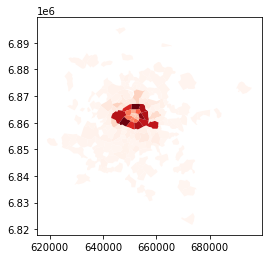

In [162]:
fig, ax=plt.subplots()
gdf.merge(pd.DataFrame({'insee': x.index.astype(int), 'counts': x.values}), on='insee').plot(column='counts', cmap='Reds', ax=ax)